#Milestone 2:Data Collection&Preparation

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [3]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [4]:
df.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [5]:
df['Gender']=df['Gender'].map({'Female':1,'Male':0})
df.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0     0.0      No          0      Graduate            No             5849   
1     0.0     Yes          1      Graduate            No             4583   
2     0.0     Yes          0      Graduate           Yes             3000   
3     0.0     Yes          0  Not Graduate            No             2583   
4     0.0      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [6]:
df['Property_Area']=df['Property_Area'].map({'Urban':2,'Semiurban':1, 'Rural':0})
df.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0     0.0      No          0      Graduate            No             5849   
1     0.0     Yes          1      Graduate            No             4583   
2     0.0     Yes          0      Graduate           Yes             3000   
3     0.0     Yes          0  Not Graduate            No             2583   
4     0.0      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area Loan_Status  
0              2           Y  
1              0           N  
2              2           Y  
3              2           Y  
4              2           Y

In [7]:
df['Married']=df['Married'].map({'Yes':1,'No':0})
df.head()

Gender  Married Dependents     Education Self_Employed  ApplicantIncome  \
0     0.0      0.0          0      Graduate            No             5849   
1     0.0      1.0          1      Graduate            No             4583   
2     0.0      1.0          0      Graduate           Yes             3000   
3     0.0      1.0          0  Not Graduate            No             2583   
4     0.0      0.0          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area Loan_Status  
0              2           Y  
1              0           N  
2              2           Y  
3              2           Y  
4              2           Y

In [8]:
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df.head()

Gender  Married Dependents  Education Self_Employed  ApplicantIncome  \
0     0.0      0.0          0          1            No             5849   
1     0.0      1.0          1          1            No             4583   
2     0.0      1.0          0          1           Yes             3000   
3     0.0      1.0          0          0            No             2583   
4     0.0      0.0          0          1            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area Loan_Status  
0              2           Y  
1              0           N  
2              2           Y  
3              2           Y  
4              2           Y

In [9]:
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df.head()

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0     0.0      0.0          0          1            0.0             5849   
1     0.0      1.0          1          1            0.0             4583   
2     0.0      1.0          0          1            1.0             3000   
3     0.0      1.0          0          0            0.0             2583   
4     0.0      0.0          0          1            0.0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area Loan_Status  
0              2           Y  
1              0           N  
2              2           Y  
3              2           Y  
4              2           Y

In [10]:
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})
df.head()

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0     0.0      0.0          0          1            0.0             5849   
1     0.0      1.0          1          1            0.0             4583   
2     0.0      1.0          0          1            1.0             3000   
3     0.0      1.0          0          0            0.0             2583   
4     0.0      0.0          0          1            0.0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2            1  
3              2            1  
4              2            1

In [11]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [13]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [14]:
df['Dependents']=df['Dependents'].str.replace('+','')

In [15]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [16]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [17]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])

In [18]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [19]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [20]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 57.7+ KB


In [22]:
df['Gender']=df['Gender'].astype('int64')
df['Married']=df['Married'].astype('int64')
df['Dependents']=df['Dependents'].astype('int64')
df['Self_Employed']=df['Self_Employed'].astype('int64')
df['CoapplicantIncome']=df['CoapplicantIncome'].astype('int64')
df['LoanAmount']=df['LoanAmount'].astype('int64')
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int64')
df['Credit_History']=df['Credit_History'].astype('int64')

#Handling Imbalance data

In [23]:
from imblearn.combine import SMOTETomek

In [24]:
smote = SMOTETomek()

In [25]:
y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'],axis=1)

In [26]:
x.shape

(614, 11)

In [27]:
y.shape

(614,)

In [28]:
x_bal,y_bal = smote.fit_resample(x,y)

In [29]:
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    358
0    358
Name: Loan_Status, dtype: int64


#Milestone 3: Exploratory Data Analysis

In [30]:
df.describe()

Gender     Married  Dependents   Education  Self_Employed  \
count  614.000000  614.000000  614.000000  614.000000     614.000000   
mean     0.182410    0.653094    0.744300    0.781759       0.133550   
std      0.386497    0.476373    1.009623    0.413389       0.340446   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      0.000000    0.000000    0.000000    1.000000       0.000000   
50%      0.000000    1.000000    0.000000    1.000000       0.000000   
75%      0.000000    1.000000    1.000000    1.000000       0.000000   
max      1.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000          614.00000  614.000000        614.000000   
mean       5403.459283         1621.24430  145.465798        342.410423   
std        6109.041673         2926.24876   84.180967         64.428629   
min         150.000000            0.00000    9.000000         12.000000   
25%        2877.500000            0.00000  100.250000        360.000000   
50%        3812.500000         1188.50000  125.000000        360.000000   
75%        5795.000000         2297.25000  164.750000        360.000000   
max       81000.000000        41667.00000  700.000000        480.000000   

       Credit_History  Property_Area  Loan_Status  
count      614.000000     614.000000   614.000000  
mean         0.855049       1.037459     0.687296  
std          0.352339       0.787482     0.463973  
min          0.000000       0.000000     0.000000  
25%          1.000000       0.000000     0.000000  
50%          1.000000       1.000000     1.000000  
75%          1.000000       2.000000     1.000000  
max          1.000000       2.000000     1.000000

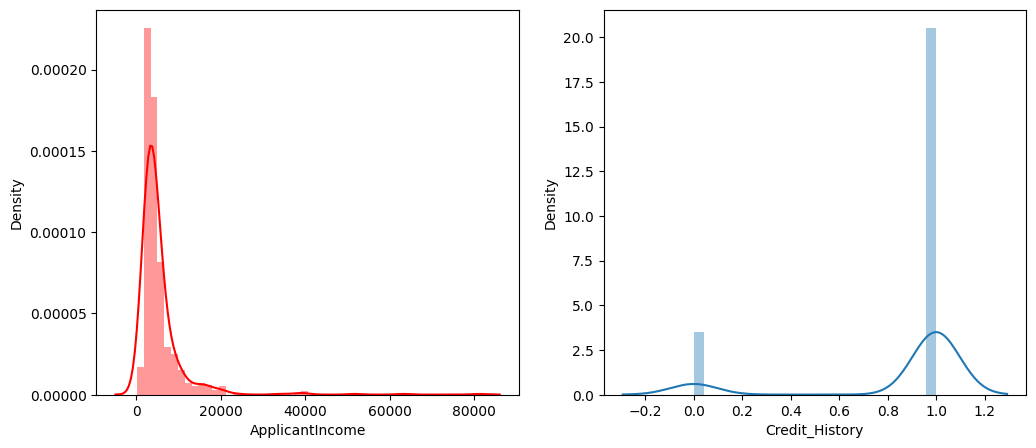

In [31]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['ApplicantIncome'], color='r')
plt.subplot(122)
sns.distplot(df['Credit_History'])
plt.show()

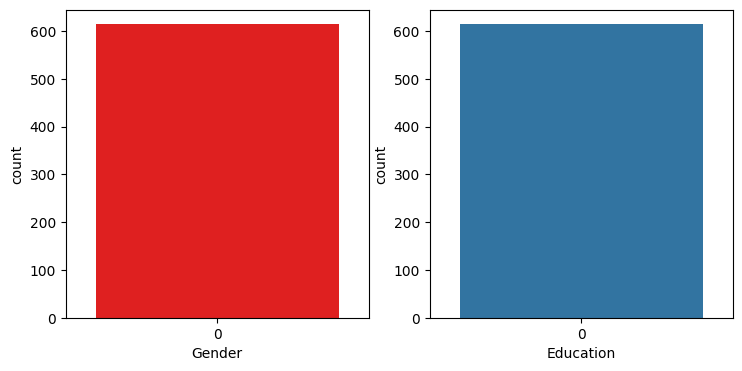

In [32]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(df ['Gender'],color='r')
plt.xlabel('Gender')
plt.subplot(1,4,2)
sns.countplot(df['Education'])
plt.xlabel('Education')
plt.show()

<Axes: ylabel='count'>

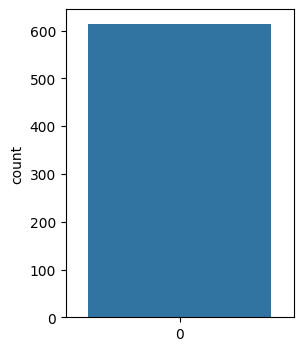

In [33]:
plt.figure(figsize=(10,4))
plt.subplot(131)
sns.countplot(df['Married'])

<Axes: xlabel='Property_Area', ylabel='count'>

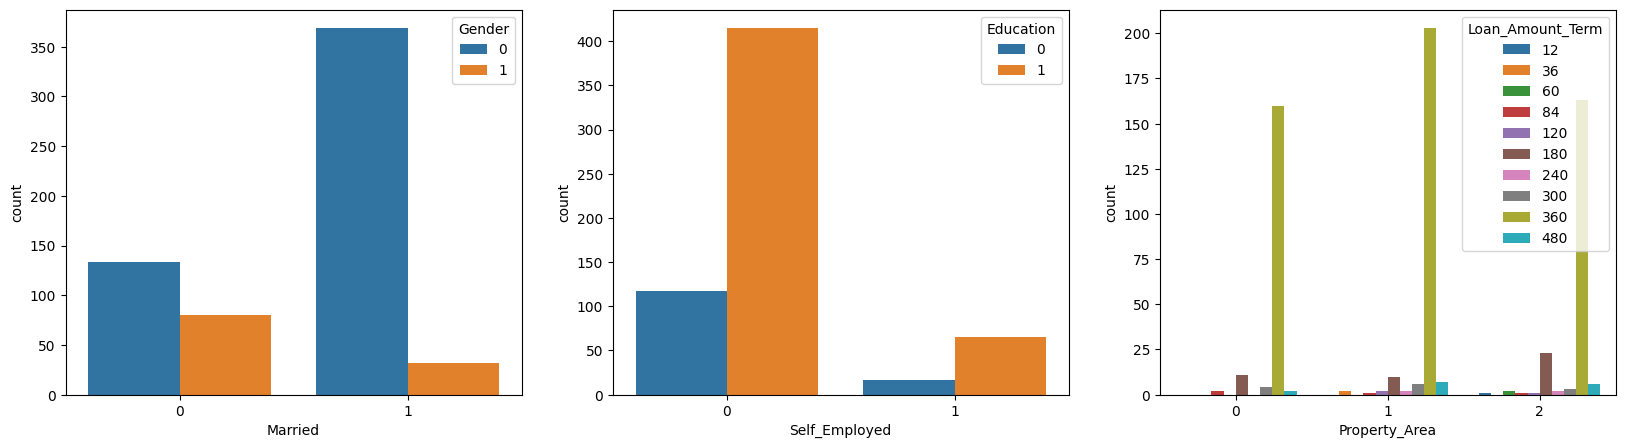

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x = 'Married', hue = "Gender", data = df)
plt.subplot(1,3,2)
sns.countplot(x = 'Self_Employed', hue = "Education", data = df)
plt.subplot(1,3,3)
sns.countplot(x = 'Property_Area', hue = "Loan_Amount_Term", data = df)

In [35]:
pd.crosstab(df['Gender'],[df['Self_Employed']])

Self_Employed    0   1
Gender                
0              435  67
1               97  15

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

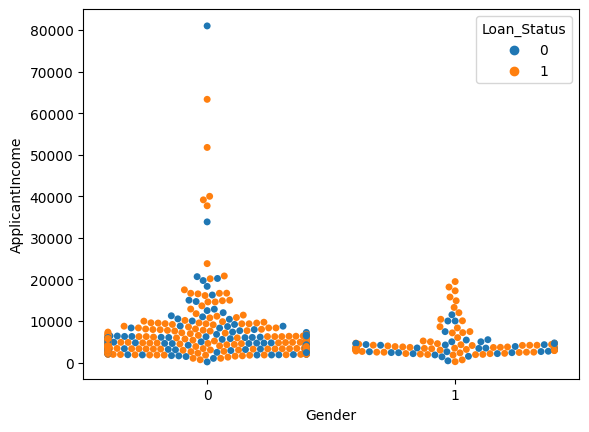

In [36]:
sns.swarmplot(x = 'Gender', y = 'ApplicantIncome', hue = "Loan_Status", data = df)

In [37]:
names = x_bal.columns

In [38]:
x_bal.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       0        0           0          1              0             5849   
1       0        1           1          1              0             4583   
2       0        1           0          1              1             3000   
3       0        1           0          0              0             2583   
4       0        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0         120               360               1   
1               1508         128               360               1   
2                  0          66               360               1   
3               2358         120               360               1   
4                  0         141               360               1   

   Property_Area  
0              2  
1              0  
2              2  
3              2  
4              2

In [39]:
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)

In [40]:
x_bal = pd.DataFrame(x_bal,columns=names)
x_bal.head()

Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0 -0.439697 -1.167491   -0.693119   0.613941      -0.331779         0.139585   
1 -0.439697  0.856537    0.397591   0.613941      -0.331779        -0.096839   
2 -0.439697  0.856537   -0.693119   0.613941       3.014052        -0.392462   
3 -0.439697  0.856537   -0.693119  -1.628822      -0.331779        -0.470336   
4 -0.439697 -1.167491   -0.693119   0.613941      -0.331779         0.167784   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.517437   -0.287805          0.261454        0.616097   
1          -0.043436   -0.180331          0.261454        0.616097   
2          -0.517437   -1.013254          0.261454        0.616097   
3           0.223740   -0.287805          0.261454        0.616097   
4          -0.517437   -0.005685          0.261454        0.616097   

   Property_Area  
0       1.357795  
1      -1.203947  
2       1.357795  
3       1.357795  
4       1.357795

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x_bal,y_bal, test_size=0.33, random_state=42)

In [42]:
x_train.shape 

(479, 11)

In [43]:
x_test.shape 

(237, 11)

In [44]:
y_train.shape, y_test.shape

((479,), (237,))

#Milestone 4:Model Building

In [45]:
#decision tree model
def RandomForest(x_train,x_test,y_train,y_test):
    model = RandomForestClassifier()
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print(accuracy_score(y_tr,y_train))
    yPred = model.predict(x_test)
    print(accuracy_score(yPred,y_test))

In [46]:
RandomForest(x_train,x_test,y_train,y_test)

1.0
0.8523206751054853


In [47]:
def decisionTree(x_train,x_test,y_train,y_test):
    model = DecisionTreeClassifier()
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print(accuracy_score(y_tr,y_train))
    yPred = model.predict(x_test)
    print(accuracy_score(yPred,y_test))

In [48]:
decisionTree(x_train,x_test,y_train,y_test)

1.0
0.759493670886076


In [49]:
def KNN(x_train,x_test,y_train,y_test):
    model = KNeighborsClassifier()
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print(accuracy_score(y_tr,y_train))
    yPred = model.predict(x_test)
    print(accuracy_score(yPred,y_test))

In [50]:
KNN(x_train,x_test,y_train,y_test)

0.8350730688935282
0.7805907172995781


In [51]:
def XGB(x_train,x_test,y_train,y_test):
    model = GradientBoostingClassifier()
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print(accuracy_score(y_tr,y_train))
    yPred = model.predict(x_test)
    print(accuracy_score(yPred,y_test))

In [52]:
XGB(x_train,x_test,y_train,y_test)

0.9331941544885177
0.8354430379746836


In [53]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [54]:
classifier = Sequential()
classifier.add(Dense(units=100, activation='relu', input_dim=11))

In [55]:
classifier.add(Dense(units=50, activation='relu'))

In [56]:
classifier.add(Dense(units=1, activation='sigmoid'))

In [57]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
classifier.fit(x_train,y_train,batch_size=100, validation_split=0.2, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 78ms/step - loss: 0.7326 - accuracy: 0.4961 - val_loss: 0.6958 - val_accuracy: 0.5208
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6820 - accuracy: 0.4935 - val_loss: 0.6626 - val_accuracy: 0.6146
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6431 - accuracy: 0.6005 - val_loss: 0.6395 - val_accuracy: 0.6250
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6109 - accuracy: 0.6945 - val_loss: 0.6237 - val_accuracy: 0.6667
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5837 - accuracy: 0.7493 - val_loss: 0.6111 - val_accuracy: 0.6667
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5592 - accuracy: 0.7755 - val_loss: 0.6005 - val_accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5360 - accuracy: 0.7911 - val_loss: 0.5920 - val_accuracy: 0.6875
Epoch 8/100
4/4 [===

In [59]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       114
           1       0.80      0.71      0.75       123

    accuracy                           0.76       237
   macro avg       0.76      0.76      0.76       237
weighted avg       0.76      0.76      0.75       237



In [61]:
confusion_matrix(y_test,dt.predict(x_test))

array([[92, 22],
       [36, 87]])

In [62]:
dt.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

array([0])

In [63]:
rfr = RandomForestClassifier()
rfr.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       114
           1       0.80      0.71      0.75       123

    accuracy                           0.76       237
   macro avg       0.76      0.76      0.76       237
weighted avg       0.76      0.76      0.75       237



In [65]:
rfr.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

array([0])

In [66]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [67]:
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       114
           1       0.80      0.71      0.75       123

    accuracy                           0.76       237
   macro avg       0.76      0.76      0.76       237
weighted avg       0.76      0.76      0.75       237



In [68]:
knn.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

array([1])

In [69]:
xgb = GradientBoostingClassifier()
xgb.fit(x_train,y_train)

GradientBoostingClassifier()

In [70]:
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       114
           1       0.80      0.71      0.75       123

    accuracy                           0.76       237
   macro avg       0.76      0.76      0.76       237
weighted avg       0.76      0.76      0.75       237



In [71]:
xgb.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

array([0])

In [72]:
classifier.save("loan.h5")

In [73]:
y_pred = classifier.predict(x_test)

8/8 [==============================] - 0s 2ms/step


In [74]:
y_pred

array([[6.87436521e-01],
       [4.84723508e-01],
       [9.19740915e-01],
       [2.26081274e-02],
       [5.17465523e-04],
       [6.80166588e-04],
       [9.03828859e-01],
       [9.28311527e-01],
       [8.40502560e-01],
       [1.35618870e-06],
       [8.13009560e-01],
       [1.36208371e-06],
       [3.94789735e-04],
       [5.94392896e-01],
       [5.02505958e-01],
       [5.43623984e-01],
       [6.22702360e-01],
       [4.93317962e-01],
       [5.43698661e-06],
       [4.44964498e-05],
       [8.02001655e-01],
       [3.97173285e-01],
       [1.11632537e-04],
       [2.52133518e-01],
       [9.35359657e-01],
       [8.65067601e-01],
       [8.86492193e-01],
       [9.63652492e-01],
       [6.23812914e-01],
       [9.91279066e-01],
       [1.49846158e-03],
       [9.92925704e-01],
       [7.51493394e-01],
       [3.91429327e-02],
       [3.33564311e-01],
       [4.32458520e-02],
       [9.23532128e-01],
       [7.42525101e-01],
       [9.96126652e-01],
       [8.65817249e-01],


In [75]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [76]:
def predict_exit(sample_value):
    sample_value = np.array(sample_value)
    sample_value = sample_value.reshape(1, -1)
    sample_valu = sc.transform(sample_value)
    return classifier.predict(sample_value)

In [77]:
sample_value = [[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]]
if predict_exit(sample_value)>0.5:
    print('Prediction: High Chance of Loan Approval!')
else:
    print('Prediction: Low Chance of Loan Approval!')

1/1 [==============================] - 0s 54ms/step
Prediction: Low Chance of Loan Approval!


In [78]:
sample_value = [[1,0, 1, 1, 1, 45, 14,45, 240, 1,1]]
if predict_exit(sample_value)>0.5:
    print('Prediction: High Chance of Loan Approval!')
else:
    print('Prediction: Low Chance of Loan Approval!')

1/1 [==============================] - 0s 20ms/step
Prediction: Low Chance of Loan Approval!


#Milestone 5: Performance Testing & Hyperparameter Tuning

In [79]:
def compareModel(x_train,x_test,y_train,y_test):
    decisionTree(x_train,x_test,y_train,y_test)
    print('-'*100)
    RandomForest(x_train,x_test,y_train,y_test)
    print('-'*100)
    XGB(x_train,x_test,y_train,y_test)
    print('-'*100)
    KNN(x_train,x_test,y_train,y_test)
    print('-'*100)

In [80]:
compareModel(x_train,x_test,y_train,y_test)
decisionTree(x_train,x_test,y_train,y_test)
print(classification_report(y_test,dt.predict(x_test)))

1.0
0.7721518987341772
----------------------------------------------------------------------------------------------------
1.0
0.8565400843881856
----------------------------------------------------------------------------------------------------
0.9331941544885177
0.8354430379746836
----------------------------------------------------------------------------------------------------
0.8350730688935282
0.7805907172995781
----------------------------------------------------------------------------------------------------
1.0
0.7468354430379747
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       114
           1       0.80      0.71      0.75       123

    accuracy                           0.76       237
   macro avg       0.76      0.76      0.76       237
weighted avg       0.76      0.76      0.75       237



In [81]:
RandomForest(x_train,x_test,y_train,y_test)
print(classification_report(y_test,dt.predict(x_test)))

1.0
0.8523206751054853
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       114
           1       0.80      0.71      0.75       123

    accuracy                           0.76       237
   macro avg       0.76      0.76      0.76       237
weighted avg       0.76      0.76      0.75       237



In [82]:
XGB(x_train,x_test,y_train,y_test)
print(classification_report(y_test,dt.predict(x_test)))

0.9331941544885177
0.8354430379746836
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       114
           1       0.80      0.71      0.75       123

    accuracy                           0.76       237
   macro avg       0.76      0.76      0.76       237
weighted avg       0.76      0.76      0.75       237



In [83]:
KNN(x_train,x_test,y_train,y_test)
print(classification_report(y_test,dt.predict(x_test)))

0.8350730688935282
0.7805907172995781
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       114
           1       0.80      0.71      0.75       123

    accuracy                           0.76       237
   macro avg       0.76      0.76      0.76       237
weighted avg       0.76      0.76      0.75       237



In [84]:
y_pred = y_pred.astype(int)
y_pred

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [85]:
ypred = classifier.predict(x_test)
print(accuracy_score(y_test,y_pred))
print("ANN Model")
print("Confusion_Matrix") 
print(confusion_matrix(y_test,y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))

8/8 [==============================] - 0s 1ms/step
0.7805907172995781
ANN Model
Confusion_Matrix
[[ 81  33]
 [ 19 104]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       114
           1       0.76      0.85      0.80       123

    accuracy                           0.78       237
   macro avg       0.78      0.78      0.78       237
weighted avg       0.78      0.78      0.78       237



In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
ypred = rf.predict(x_test)

In [88]:
f1_score(ypred,y_test,average='weighted')

0.852616493330016

In [89]:
cv = cross_val_score(rf,x,y,cv=5)

In [90]:
np.mean(cv)

0.7850193256030921

In [91]:
ypred = classifier.predict(x_test)
print(accuracy_score(y_test,y_pred))
print("Random Froest")
print("Confusion_Matrix") 
print(confusion_matrix(y_test,y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))

8/8 [==============================] - 0s 2ms/step
0.7805907172995781
Random Froest
Confusion_Matrix
[[ 81  33]
 [ 19 104]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       114
           1       0.76      0.85      0.80       123

    accuracy                           0.78       237
   macro avg       0.78      0.78      0.78       237
weighted avg       0.78      0.78      0.78       237



In [92]:
ypred = classifier.predict(x_test)
print(accuracy_score(y_test,y_pred))
print("XGB")
print("Confusion_Matrix") 
print(confusion_matrix(y_test,y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))

8/8 [==============================] - 0s 2ms/step
0.7805907172995781
XGB
Confusion_Matrix
[[ 81  33]
 [ 19 104]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       114
           1       0.76      0.85      0.80       123

    accuracy                           0.78       237
   macro avg       0.78      0.78      0.78       237
weighted avg       0.78      0.78      0.78       237



#Hyper Parameter Tuning

In [93]:
rf = RandomForestClassifier()

In [94]:
parameters = {
                'n_estimators' :[1,20,30,55,68,74,90,120,115],
                 'criterion':['gini','entropy'],
                  'max_features' : ["auto", "sqrt", "log2"],
              'max_depth' : [2,5,8,10], 'verbose' : [1,2,3,4,6,8,9,10]
}

In [95]:
RCV = RandomizedSearchCV(estimator=rf,param_distributions=parameters,cv=10,n_iter=4)

In [96]:
RCV.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building t

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elap

building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
buildi

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.

building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elaps

building tree 7 of 55
building tree 8 of 55
building tree 9 of 55
building tree 10 of 55
building tree 11 of 55
building tree 12 of 55
building tree 13 of 55
building tree 14 of 55
building tree 15 of 55
building tree 16 of 55
building tree 17 of 55
building tree 18 of 55
building tree 19 of 55
building tree 20 of 55
building tree 21 of 55
building tree 22 of 55
building tree 23 of 55
building tree 24 of 55
building tree 25 of 55
building tree 26 of 55
building tree 27 of 55
building tree 28 of 55
building tree 29 of 55
building tree 30 of 55
building tree 31 of 55
building tree 32 of 55
building tree 33 of 55
building tree 34 of 55
building tree 35 of 55
building tree 36 of 55
building tree 37 of 55
building tree 38 of 55
building tree 39 of 55
building tree 40 of 55
building tree 41 of 55
building tree 42 of 55
building tree 43 of 55
building tree 44 of 55
building tree 45 of 55
building tree 46 of 55
building tree 47 of 55
building tree 48 of 55
building tree 49 of 55
building tree 

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.

building tree 6 of 55
building tree 7 of 55
building tree 8 of 55
building tree 9 of 55
building tree 10 of 55
building tree 11 of 55
building tree 12 of 55
building tree 13 of 55
building tree 14 of 55
building tree 15 of 55
building tree 16 of 55
building tree 17 of 55
building tree 18 of 55
building tree 19 of 55
building tree 20 of 55
building tree 21 of 55
building tree 22 of 55
building tree 23 of 55
building tree 24 of 55
building tree 25 of 55
building tree 26 of 55
building tree 27 of 55
building tree 28 of 55
building tree 29 of 55
building tree 30 of 55
building tree 31 of 55
building tree 32 of 55
building tree 33 of 55
building tree 34 of 55
building tree 35 of 55
building tree 36 of 55
building tree 37 of 55
building tree 38 of 55
building tree 39 of 55
building tree 40 of 55
building tree 41 of 55
building tree 42 of 55
building tree 43 of 55
building tree 44 of 55
building tree 45 of 55
building tree 46 of 55
building tree 47 of 55
building tree 48 of 55
building tree 4

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.

building tree 40 of 55
building tree 41 of 55
building tree 42 of 55
building tree 43 of 55
building tree 44 of 55
building tree 45 of 55
building tree 46 of 55
building tree 47 of 55
building tree 48 of 55
building tree 49 of 55
building tree 50 of 55
building tree 51 of 55
building tree 52 of 55
building tree 53 of 55
building tree 54 of 55
building tree 55 of 55
building tree 1 of 55
building tree 2 of 55
building tree 3 of 55
building tree 4 of 55
building tree 5 of 55
building tree 6 of 55
building tree 7 of 55
building tree 8 of 55
building tree 9 of 55
building tree 10 of 55
building tree 11 of 55
building tree 12 of 55
building tree 13 of 55
building tree 14 of 55
building tree 15 of 55
building tree 16 of 55
building tree 17 of 55
building tree 18 of 55
building tree 19 of 55
building tree 20 of 55
building tree 21 of 55
building tree 22 of 55
building tree 23 of 55
building tree 24 of 55
building tree 25 of 55
building tree 26 of 55
building tree 27 of 55
building tree 28 of 

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.

building tree 2 of 55
building tree 3 of 55
building tree 4 of 55
building tree 5 of 55
building tree 6 of 55
building tree 7 of 55
building tree 8 of 55
building tree 9 of 55
building tree 10 of 55
building tree 11 of 55
building tree 12 of 55
building tree 13 of 55
building tree 14 of 55
building tree 15 of 55
building tree 16 of 55
building tree 17 of 55
building tree 18 of 55
building tree 19 of 55
building tree 20 of 55
building tree 21 of 55
building tree 22 of 55
building tree 23 of 55
building tree 24 of 55
building tree 25 of 55
building tree 26 of 55
building tree 27 of 55
building tree 28 of 55
building tree 29 of 55
building tree 30 of 55
building tree 31 of 55
building tree 32 of 55
building tree 33 of 55
building tree 34 of 55
building tree 35 of 55
building tree 36 of 55
building tree 37 of 55
building tree 38 of 55
building tree 39 of 55
building tree 40 of 55
building tree 41 of 55
building tree 42 of 55
building tree 43 of 55
building tree 44 of 55
building tree 45 of

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.

building tree 1 of 55
building tree 2 of 55
building tree 3 of 55
building tree 4 of 55
building tree 5 of 55
building tree 6 of 55
building tree 7 of 55
building tree 8 of 55
building tree 9 of 55
building tree 10 of 55
building tree 11 of 55
building tree 12 of 55
building tree 13 of 55
building tree 14 of 55
building tree 15 of 55
building tree 16 of 55
building tree 17 of 55
building tree 18 of 55
building tree 19 of 55
building tree 20 of 55
building tree 21 of 55
building tree 22 of 55
building tree 23 of 55
building tree 24 of 55
building tree 25 of 55
building tree 26 of 55
building tree 27 of 55
building tree 28 of 55
building tree 29 of 55
building tree 30 of 55
building tree 31 of 55
building tree 32 of 55
building tree 33 of 55
building tree 34 of 55
building tree 35 of 55
building tree 36 of 55
building tree 37 of 55
building tree 38 of 55
building tree 39 of 55
building tree 40 of 55
building tree 41 of 55
building tree 42 of 55
building tree 43 of 55
building tree 44 of 

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.

building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 90
building tree 45 of 90
building tree 46 of 90
building tree 47 of 90
building tree 48 of 90
building tree 49 of 90
building tree 50 of 90
building tree 51 of 90
building tree 52 of 90
building tree 53 of 90
building tree 54 of 90
building tree 55 of 90
building tree 56 of 90
building tree 57 of 90
building tree 58 of 90
building tree 59 of 90
building tree 60 of 90
building tree 61 of 90
building tree 62 of 90
building tree 63 of 90
building tree 64 of 90
building tree 65 of 90
building tree 66 of 90
building tree 67 of 90
building tree 68 of 90
building tree 69 of 90
building tree 70 of 90
building tr

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 90
building tree 45 of 90
building tree 46 of 90
building tree 47 of 90
building tree 48 of 90
building tree 49 of 90
building tree 50 of 90
building tree 51 of 90
building tree 52 of 90
building tree 53 of 90
building tree 54 of 90
building tree 55 of 90
building tree 56 of 90
building tree 57 of 90
building tree 58 of 90
building tree 59 of 90
building tree 60 of 90
building tree 61 of 90
building tree 62 of 90
building tree 63 of 90
building tr

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 90
building tree 45 of 90
building tree 46 of 90
building tree 47 of 90
building tree 48 of 90
building tree 49 of 90
building tree 50 of 90
building tree

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=4,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 8, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [1, 20, 30, 55, 68, 74,
                                                         90, 120, 115],
                                        'verbose': [1, 2, 3, 4, 6, 8, 9, 10]})

In [97]:
bt_params = RCV.best_params_
bt_score = RCV.best_score_

In [98]:
bt_params

{'verbose': 1,
 'n_estimators': 120,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [99]:
bt_score

0.7868351063829787

In [100]:
#training and test the xgboost model on the best parameters gor forme randomized cv
def RandomForest(x_train,x_test,y_train,y_test):
    model = RandomForestClassifier(verbose=4, n_estimators=74,max_features='log2',max_depth=10,criterion='gini')
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print("Training Accuracy")
    print(accuracy_score(y_tr,y_train))
    ypred = model.predict(x_test)
    print('Testing Accuracy')
    print(accuracy_score(ypred,y_test))

In [101]:
model = RandomForestClassifier(verbose=4, n_estimators=74,max_features='log2',max_depth=10,criterion='gini')
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 74
building tree 2 of 74
building tree 3 of 74
building tree 4 of 74
building tree 5 of 74
building tree 6 of 74
building tree 7 of 74
building tree 8 of 74
building tree 9 of 74
building tree 10 of 74
building tree 11 of 74
building tree 12 of 74
building tree 13 of 74
building tree 14 of 74
building tree 15 of 74
building tree 16 of 74
building tree 17 of 74
building tree 18 of 74
building tree 19 of 74
building tree 20 of 74
building tree 21 of 74
building tree 22 of 74
building tree 23 of 74
building tree 24 of 74
building tree 25 of 74
building tree 26 of 74
building tree 27 of 74
building tree 28 of 74
building tree 29 of 74
building tree 30 of 74
building tree 31 of 74
building tree 32 of 74
building tree 33 of 74
building tree 34 of 74
building tree 35 of 74
building tree 36 of 74
building tree 37 of 74
building tree 38 of 74
building tree 39 of 74
building tree 40 of 74
building tree 41 of 74
building tree 42 of 74
building tree 43 of 74
building tree 44 of 

[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    0.2s finished


RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=74,
                       verbose=4)

#Saving the Model

In [102]:
import pickle
pickle.dump(model,open('rdf.pkl','wb'))